## 8.1 활성 함수 
- 활성 함수의 종류는 시그모이드, 하이퍼볼릭 탄젠트(탄에이치) 등이있다.
- 시그모이드 함 수는 출력값의 범위가 0 ~ 1사이로 정해져 있다. 탄에이치 같은 경우 음의 무한대에 가까울수록 -1에 근접하는 값을 가지며, 양의 무한대에 가까울 수록 1에 근접하는 값을 가진다. 따라서 탄 에이치 함수의 범위는 -1 ~ 1사이다.

시그모이드 함수 공식
- $\frac{1}{1 + e^{-x}}$
![](https://taewanmerepo.github.io/2017/09/sigmoid/post.jpg)
<center>시그모이드 함수 그래프</center>

탄에이치 함수 공식
- $\frac{e^{2x} - 1}{e^{2x} + 1}$
![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/1-09/01-non_linear_act.png)
<center>시그모이드 함수 그래프</center>


## 8.2 로지스틱 회귀란?
- 실수 벡터로부터 불리언(True/False) 벡터를 반환하는 문제에서 사용되는 회귀 모델링 기법이다.

### 1. 로지스틱 회귀 모델의 구조 및 추론 방법 (교재 220p 그림 참고)
- 선형 회귀와 구성을 크게 다르지 않지만 선형 계층 함수 직후에 시그모이드 함수를 넣어주어 전체 모델을 구성한다. 그럼 이 모델의 출력값은 0~1사이로 고정될 것이다. 이 점을 활용하여 True/False를 구분한다.
- 이 모델의 가중치 파라마티가 잘 학습되어 있다면 0.5를 기준으로 True/False를 구분할 수 있다. 0.5이상 True, 0.5미만 False

### 2. 로지스틱 회귀 모델의 학습 (교재 221p 그림 참고)
- n차원의 입력 벡터들을 N개 수집한 후 모델에 통과시키면 N개의 m차원의 출력 벡터를 얻을 수 있다. 그러면 N개의 정답 벡터들과 모델에서 출력된 벡터들을 비교하면 손실 값을 계산할 수 있다. 다만 로지스틱은 회귀의 손실 함수는 MSE를 사용하지 않는다
- 선형 회귀와 마찬가지로 경사하강법을 사용한다.

### 3. 로지스틱 회귀의 의미
- 이름이 회귀이지만 분류에 가깝다. True/False 중 선택을 하기 때문에 이진 분류에 속한다. 

### 4. 선형 계츨의 가중치 파라미터 $\theta $를 경사하강법을 통해 업데이트하는 것은 W와 b로 각각 손길함수를 편미분한 후 경사하강법을 통해 업데이트하는 것과 같습니다.

## 8.3 로지스틱 회귀의 손실 함수
- 로지스틱은 분류 문제라고 설명이 되어있다. 분류 문제의 결과는 이산형이지만 시그모이드 함수 출력값은 연속형이다. 이때 0.5를 기준으로 True/False 구분한 후 사용한다.
- 즉, 샘플x가 주어질 때 출력은 x가 '참 클래스'에 속할 것인가?에 대한 확률 값을 표현한 것이라고 볼 수 있다.
- $0 <= P(y = True|x) <= 1$
- $P(y = True|x) = 1 - P(y = False|x)$

### 1. 이진 크로스엔트로피 손실 함수 ()
- 로지스틱이 회귀의 손실 함수는 이진 크로스엔트로피(BCE)이다. N개의 정답과 출력 모델 벡터에 대한 BCE 손실 함수는 다음과 같이 정의된다.
- 정답 벡터는 각 벡터의 요소별로 정답 여부를 가지고 있게된다.문제가 참이면 1, 거직이면 0
- $BCE(y_{1:N}, \hat{y}_{1:N}) = -\frac{1}{N}\sum_{i=1}^N y_{i}^T \cdot log\hat{y_{i}} + (1-y_{i})^T \cdot log(1-y_{i})^T)$

- $-\frac{1}{N}\sum_{i=1}^N \sum_{j=1}^m y_{i,j} \cdot log(1-y_{i,j}) + \sum_{j=1}^m(1 - y_{i,j}) \cdot log(1-y_{i,j}))$
- 수식의 두 번째 줄에서 i를 활용하는 시그마 안 쪽의 두 텀(각각 j를 활용하는 시그마) 중에 왼쪽텀은 원래 정답이 참일때 부분, 오른쪽 텀은 원래 정답이 거짓이었을 때 부분이다.

- 식을 저세히보면 j번째 요소에 대해서 항상 두 텀 중에 한 텀은 0이다. 예를 들어 $y_{i,j} = 1$이고 $1 - y_{i,j} = 0$인 경우에는 $log\hat{y}_{i,j}$가 커지면 손실값은 작아진다. 마찬가지로 정답이 0인 경우 $1 - y_{i,j} = 1$이므로 $1 - log\hat{y}_{i,j}$가 커지면 손실 값은 작아지게 된다.

## 8.4 로지스틱 회귀의 수식
- 기존 선형 회귀와 달리 타깃 출력값은 실수의 벡터 또는 행렬이 아니라 True/False에 대한 문제으므로 0 또는 1의 값만 가진다.

- $\mathcal{D} = \left\{x_{i},y_{i} \right\}_1^N$
- $where x_{1:N} \in \mathbb{R}^{N * n} and y_{1:N} \in \left\{0,1 \right\}^N*m$

- - 여기에 모델로 선형 계층과 시그모이드 함수를 합쳐 구성합니다. 그러면 수집한 N개의 입력 샘플을 통과시켜 모델의 출력값을 얻을 수 있다.
- $\hat{y}_{1:N} = \sigma(x_{1:N} \cdot W+b)$

- BCE 손실 함수를 계산하기 위한 값이 모두 준비가 되었다. 이 손실 함수는 모델 가중치 파라미터를 입력으로 받으며 그에 따른 손실 값을 출력으로 반환한다.
- $\mathcal{L}(\theta) =  -\frac{1}{N}\sum_{i=1}^N y_{i}^T \cdot log\hat{y_{i}} + (1-y_{i})^T \cdot log(1-y_{i})^T)$$

- 여기에서 찾고자 하는 모델의 가중치 파라미터는 이 손실 함수를 최소화하는 입력 값이 된다.
- $\hat{\theta} = argmin \underset{\theta \in 𝜭}{\overset{}{_{}^{}Z_{}^{}}} \mathcal{L}(\theta), where \theta = \left\{W, b \right\}$

- 이를 위해 손실 함수는 각 가중치 파라미터로 미분하여 경사하강법을 통해 손실 값을 낮추는 방향으로 가중치 파라미터를 업데이트한다.
- $W <- W - \boldsymbol{\eta} \bigtriangledown {}_{W}\mathcal{L}(W,b)$
- $b <- b - \boldsymbol{\eta} \bigtriangledown {}_{b}\mathcal{L}(W,b)$

- 이때 모델의 출력 벡터j번째 요소가 '입력 샘플이 j번째 항목에 대해서 참 클래스에 속하는가?에 대한 확률 값의 표현이라고 할 수 있다.
- $\hat{P}(y_j = True|x_{i}) \approx \hat{y}_{i,j}$

- BCE 손실 함수는 다음과 같이 다시 표현할 수 있다.

- $BCELoss(y_{1:N},{\hat{y}_{1:N}}) = 
-\frac{1}{N}\sum_{i=1}\sum_{j=1}^N y_{i,j} \cdot log(1-y_{i,j}) + \sum_{j=1}^m(1 - y_{i,j}) \cdot log(1-y_{i,j}))$
- $= -\frac{1}{N}\sum_{i=1}^N \sum_{j=1}^m P(y_i = True|x_i) \cdot logP(y_i = True|x_i : θ) + logP(y_i = False|x_i : θ) \cdot logP(y_i = False|x_i : θ)$
- $where x_{i:j} = logP(y_i = True|x_i) and 1 - P(y_i = False|x_i)$

## 8.5 로지스틱 회귀

In [1]:
# 라이브러리 불러오기

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 셋 불러오기

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

#print(cancer.DESCR)

In [2]:
# 암 데이터 df

df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['class'] = cancer.target
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


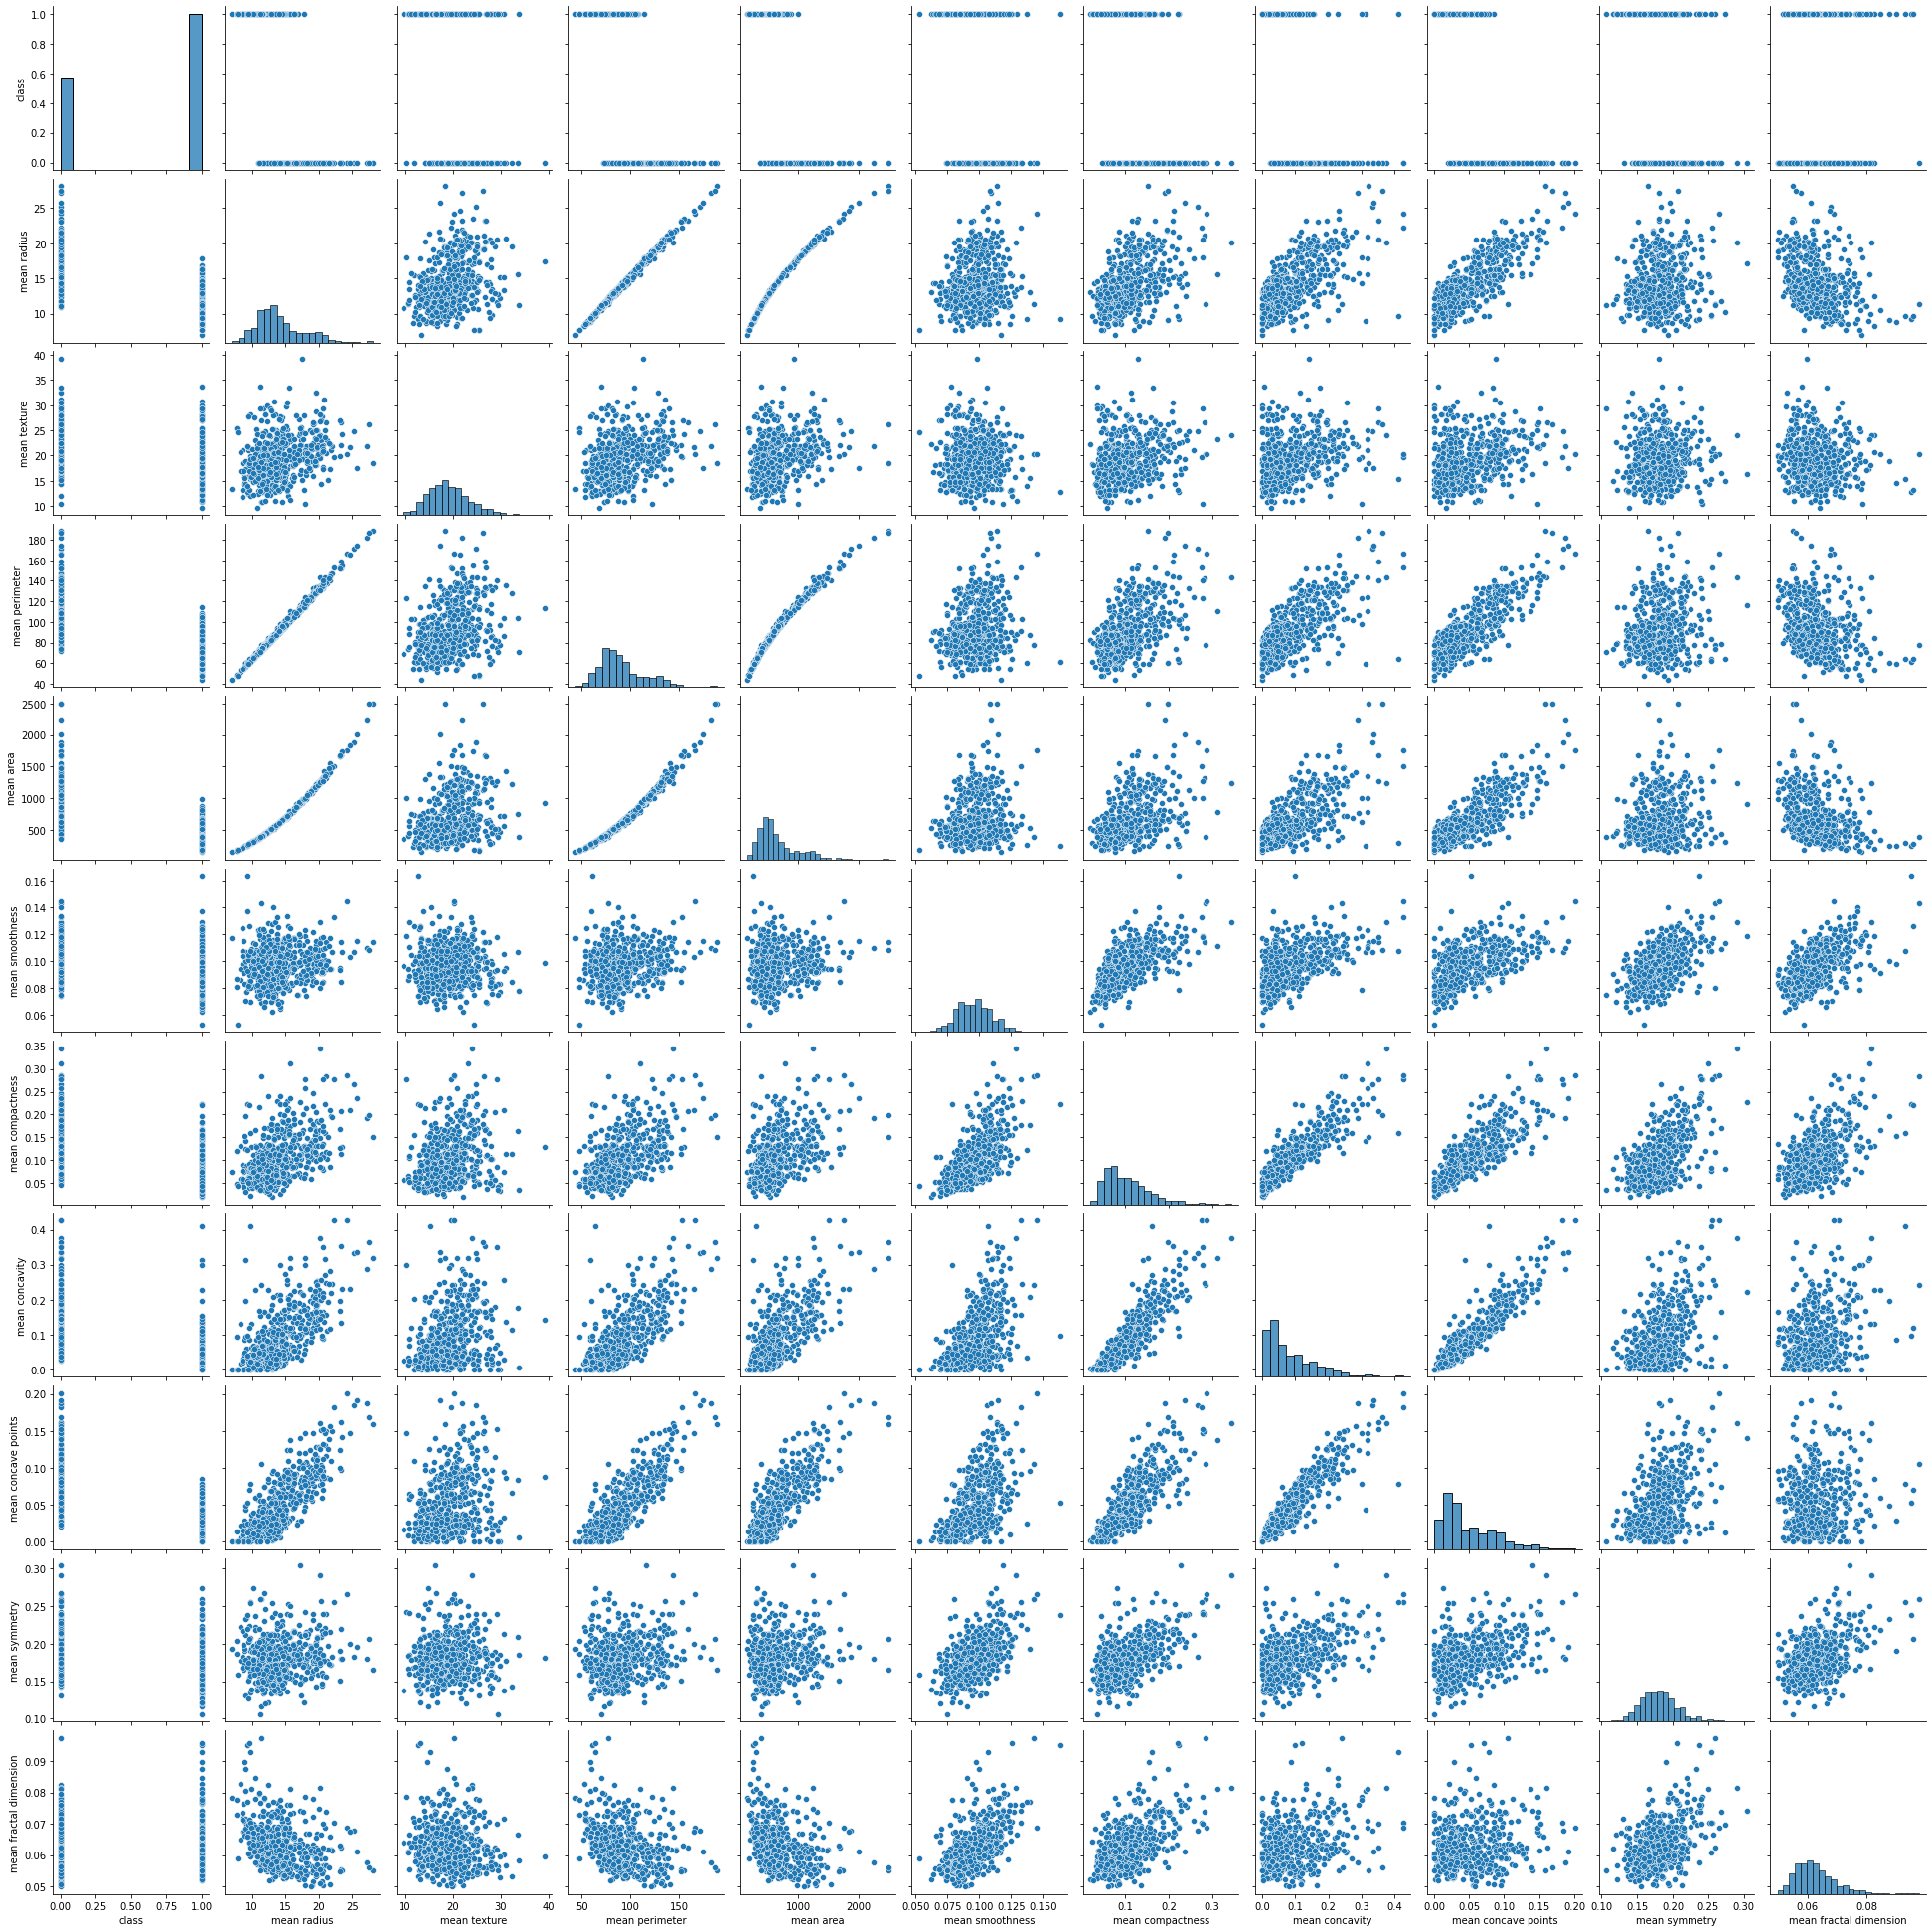

In [4]:
# 각 속성의 분포와 속성 사이의 선형적 관계 유무를 파악하기 위하여 pair plot그리기
sns.pairplot(df[['class'] + list(df.columns[:10])])
plt.show()

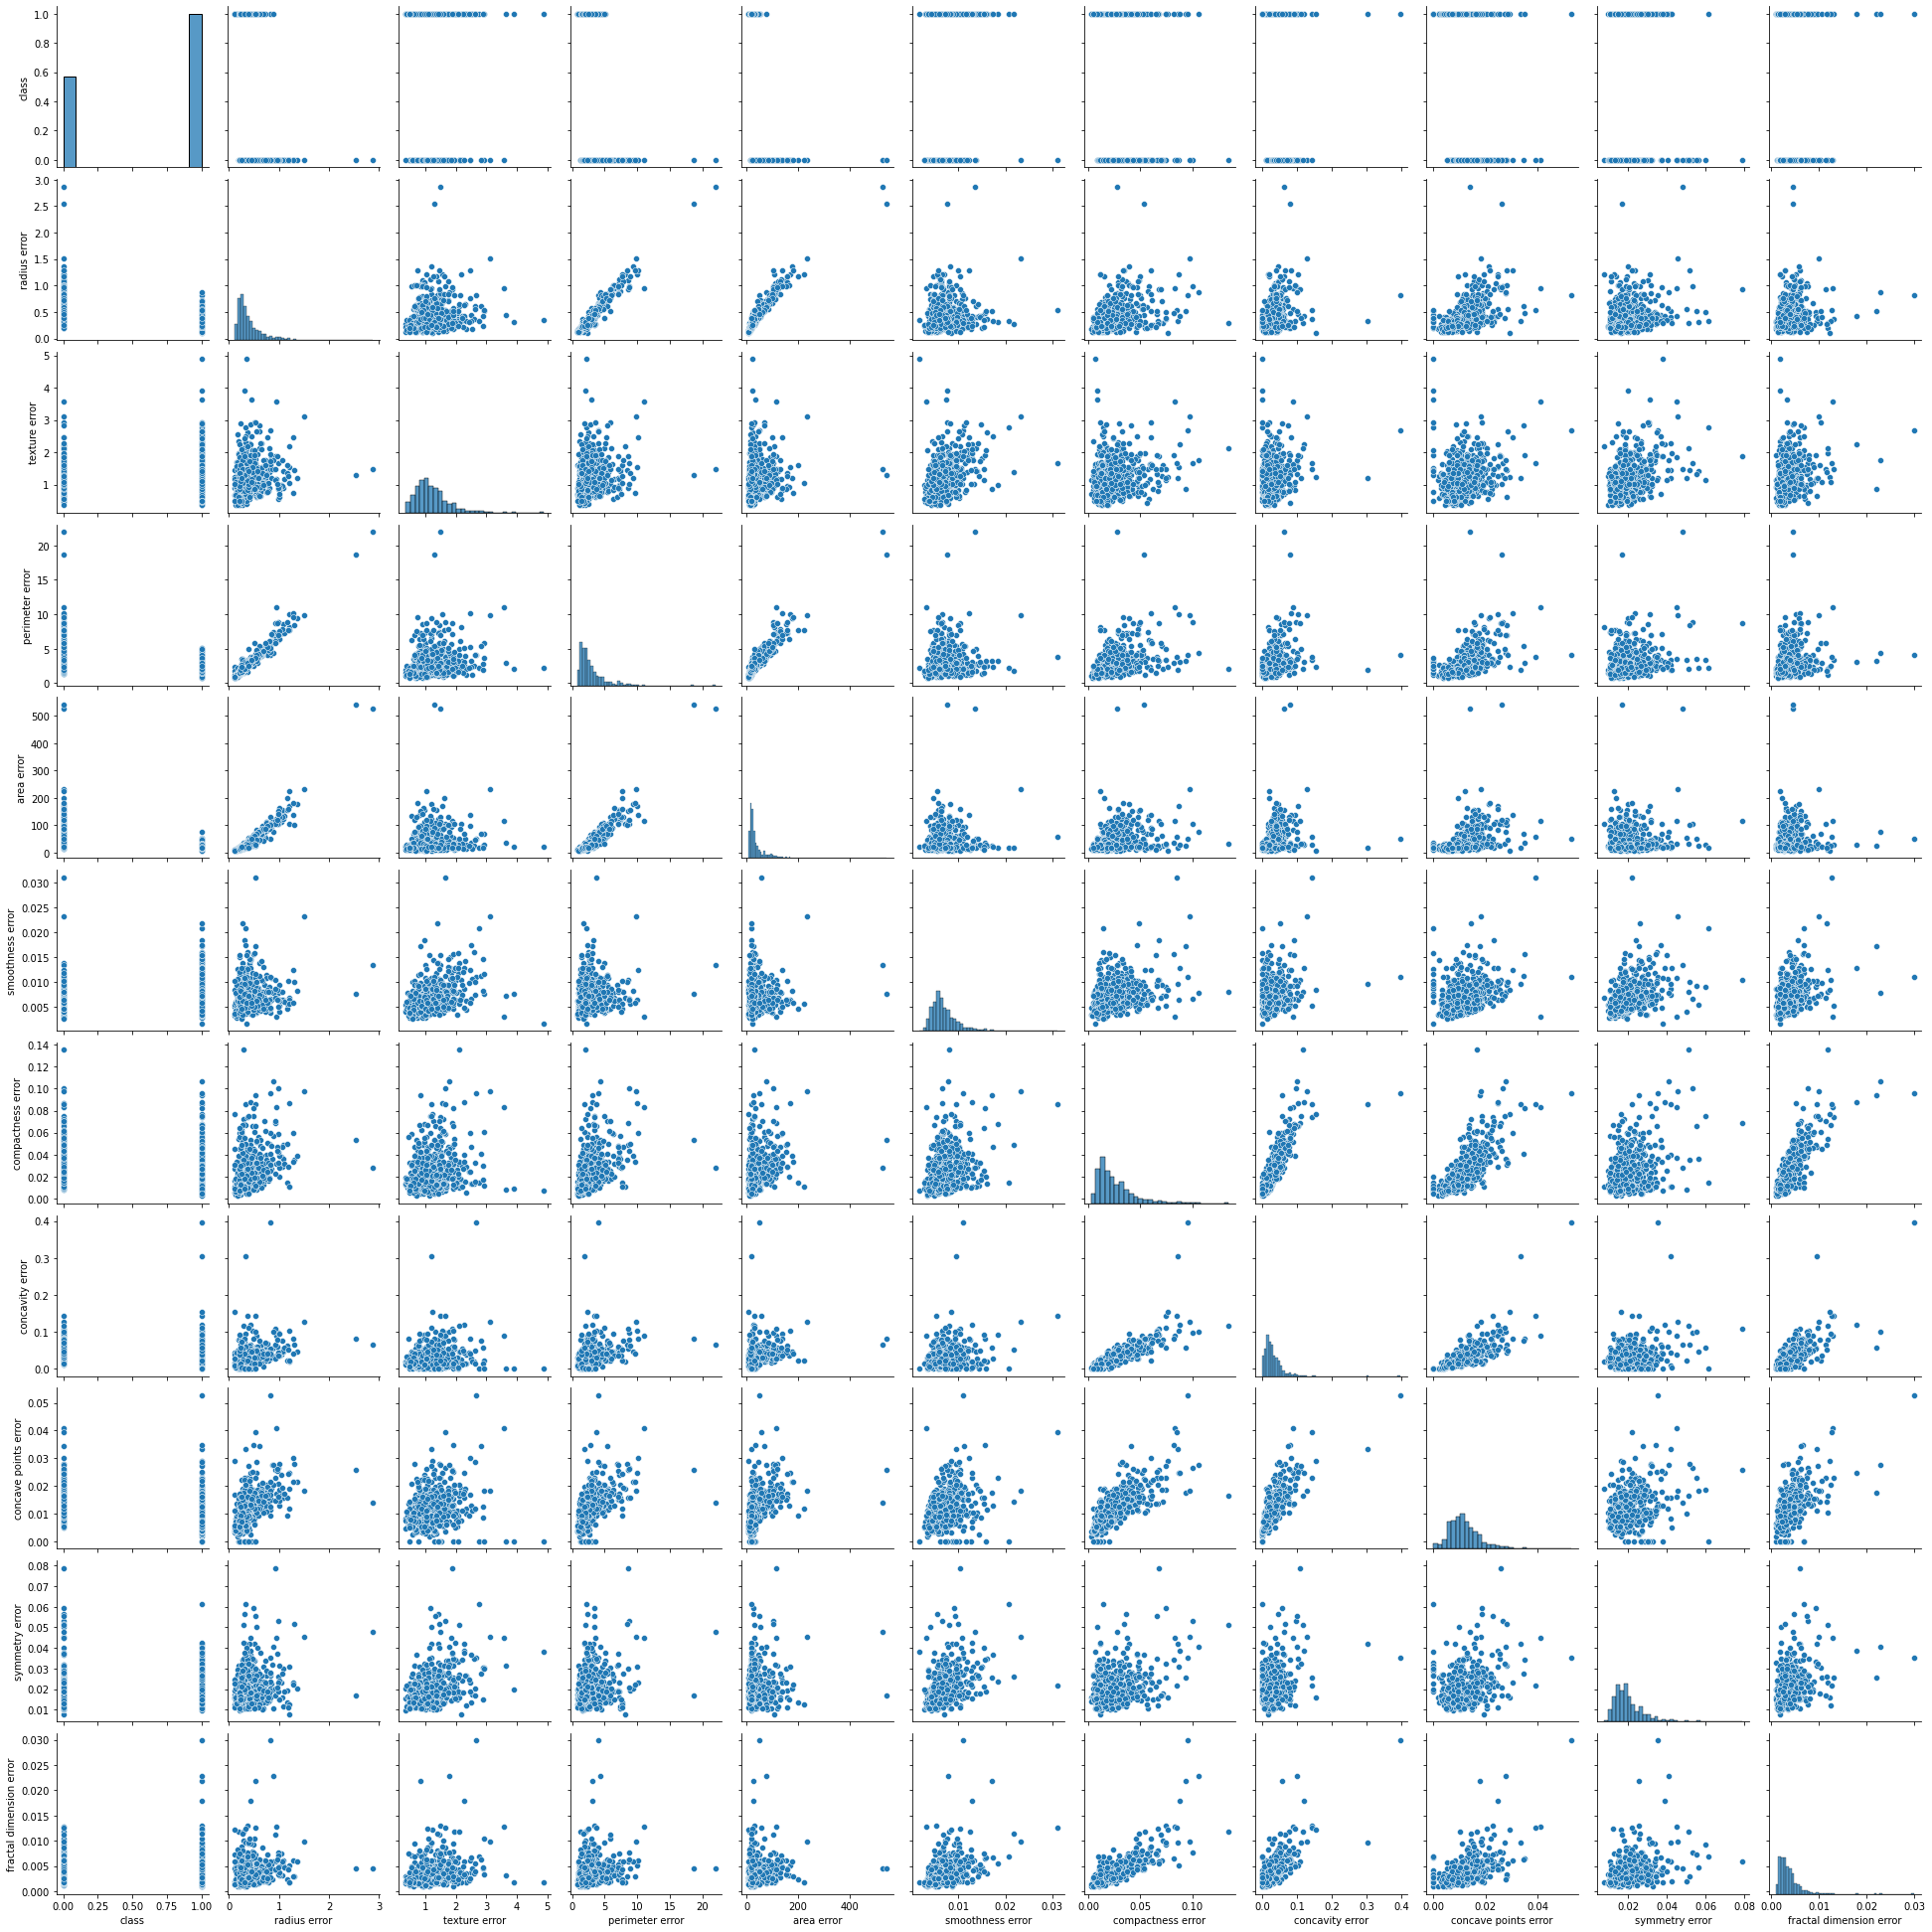

In [5]:
# 다른 클래스의 pair plot 그려보기

sns.pairplot(df[['class'] + list(df.columns[10:20])])
plt.show()

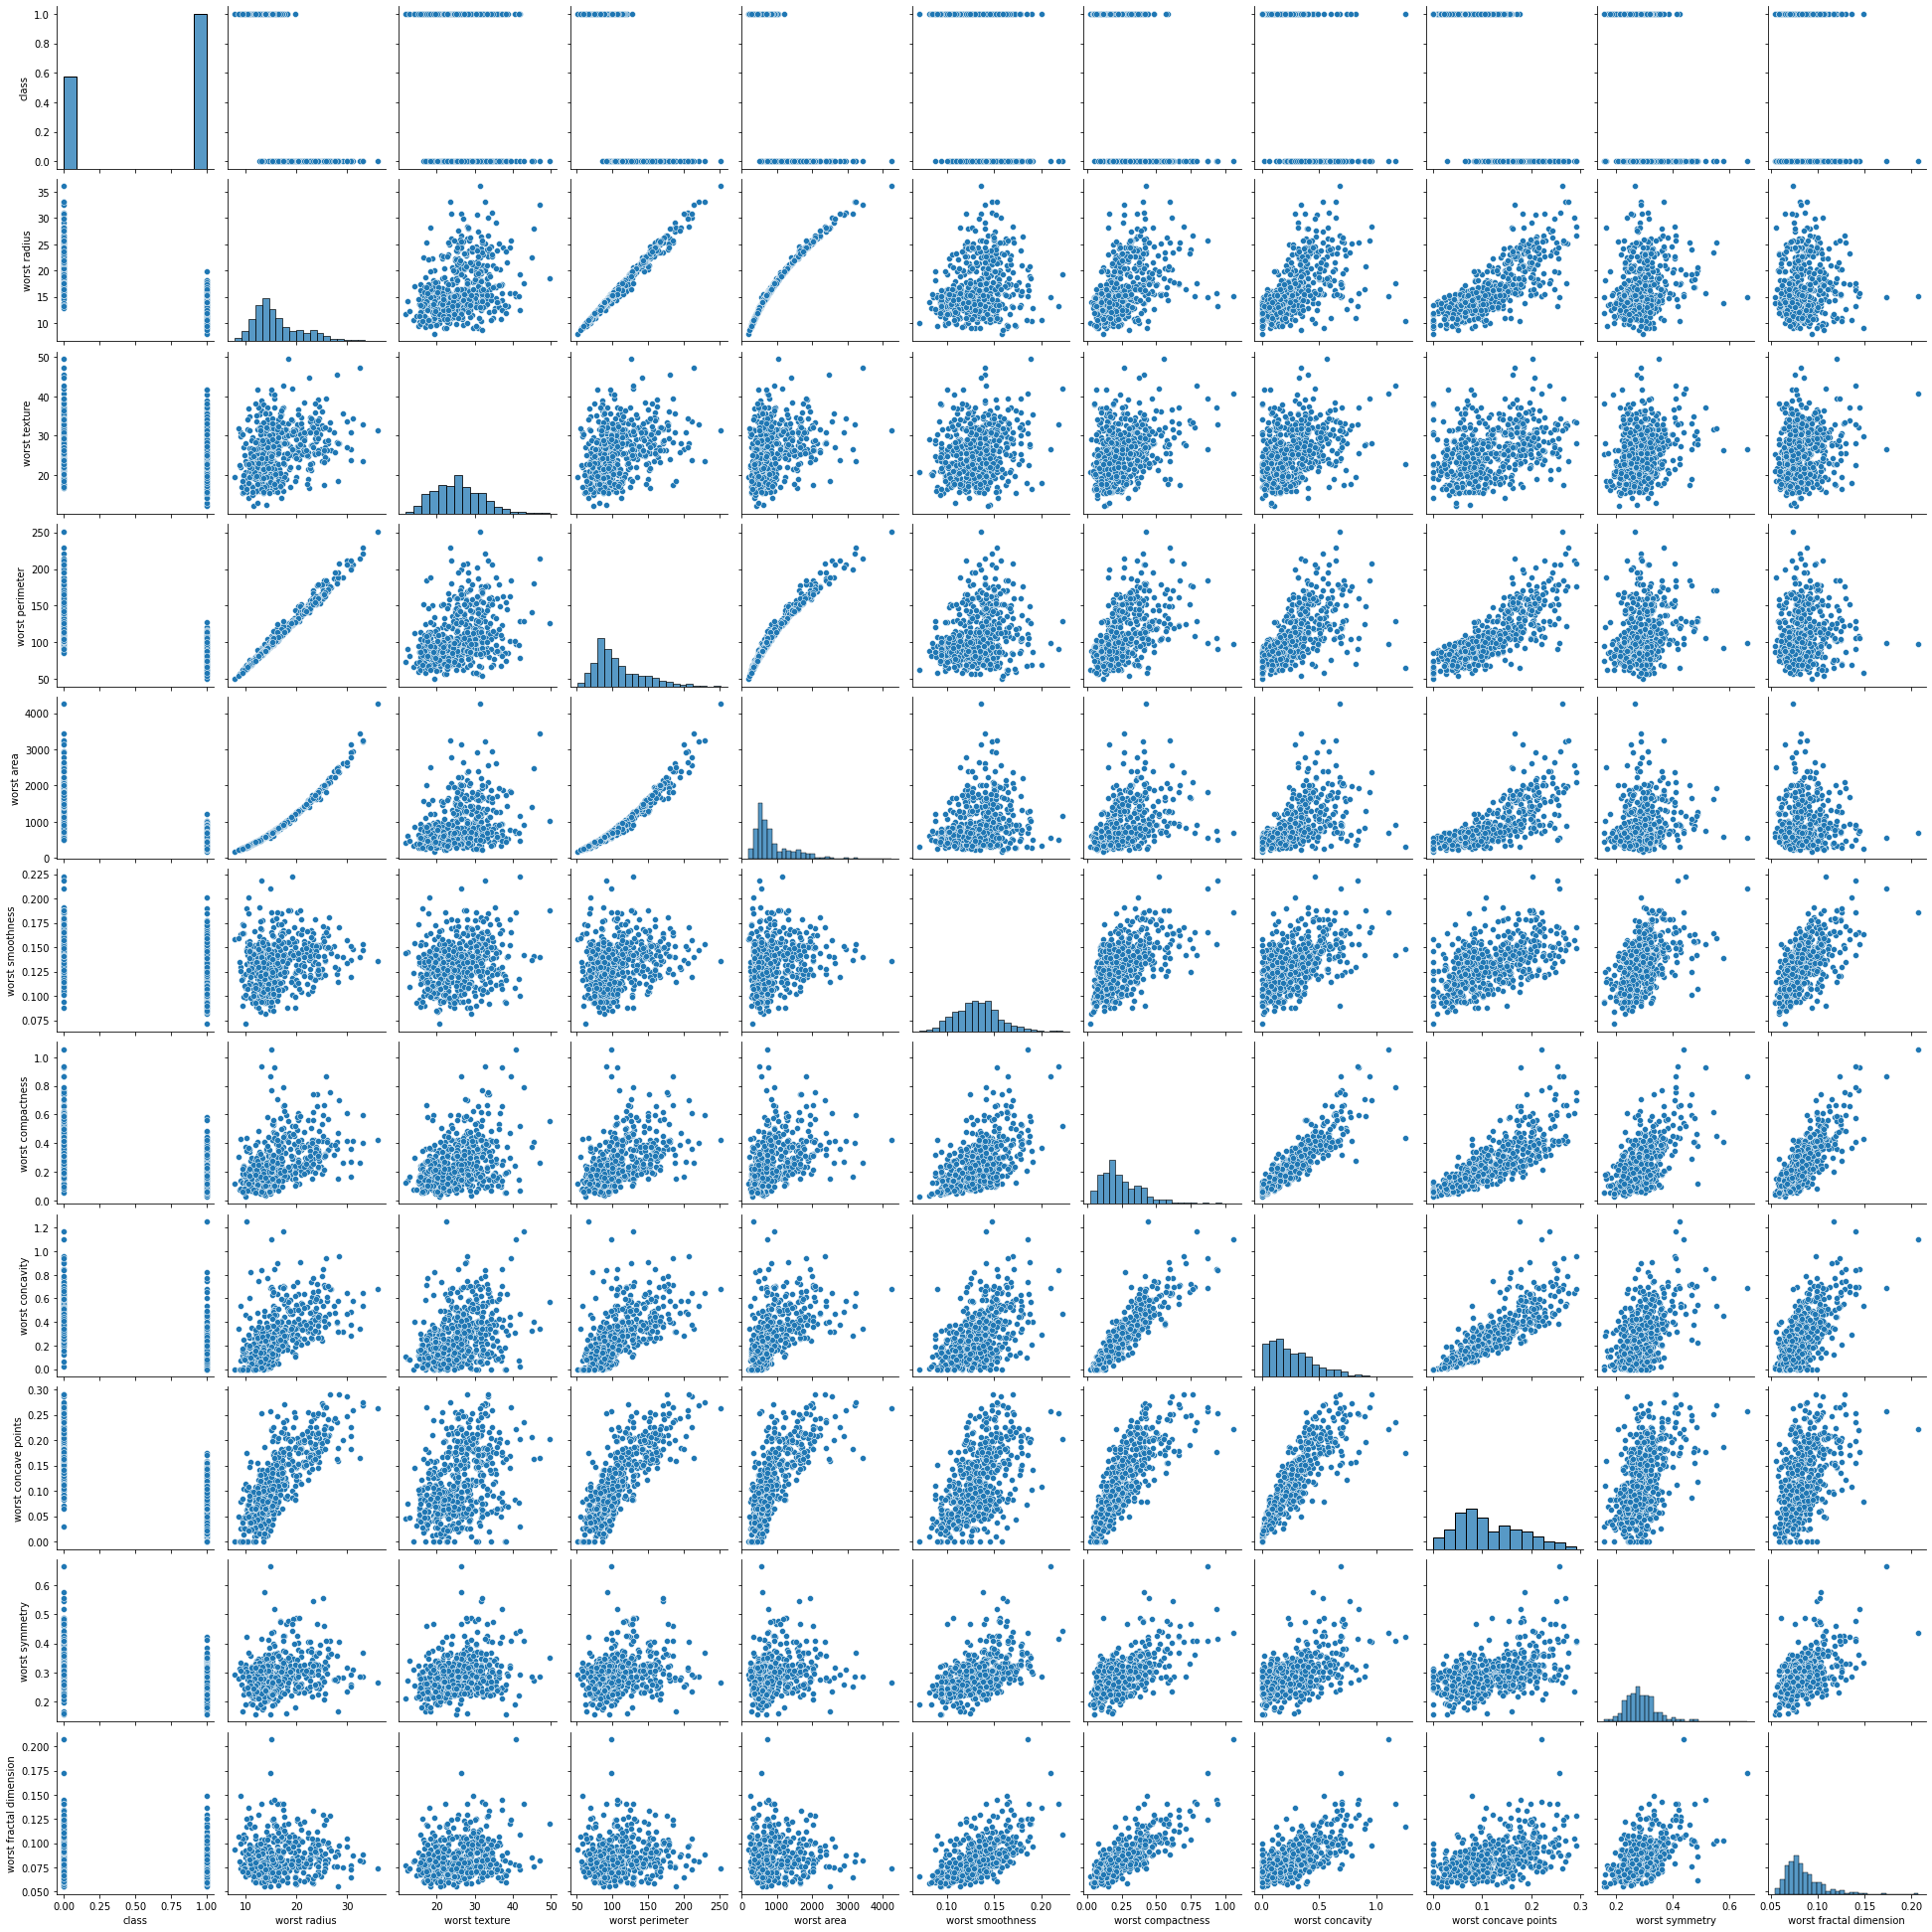

In [6]:
# 다른 클래스의 pair plot 그려보기

sns.pairplot(df[['class'] + list(df.columns[20:30])])
plt.show()

- 그래프를 살펴본 결과 표준편차 속성을 크게 도움이 안된다. 몇 개의 컬럼만 선정하여 다시 그려본다.

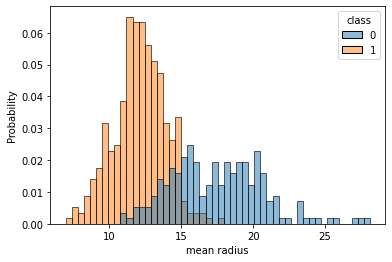

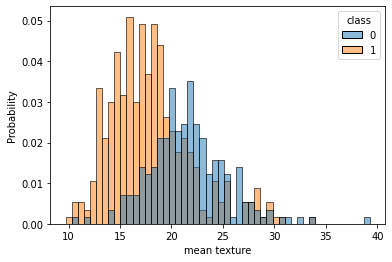

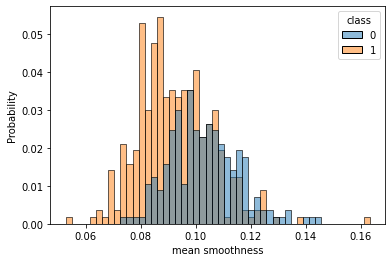

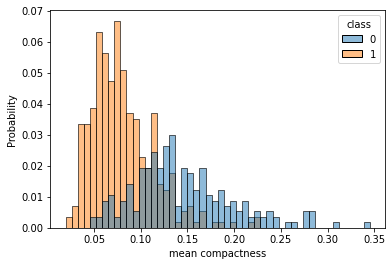

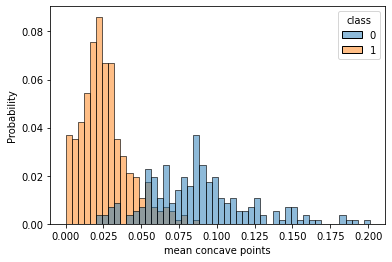

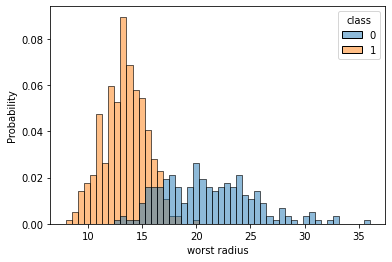

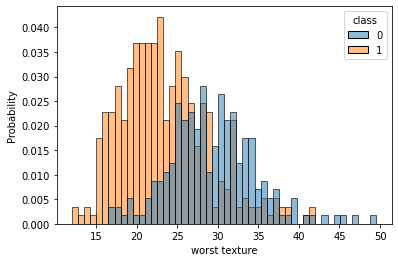

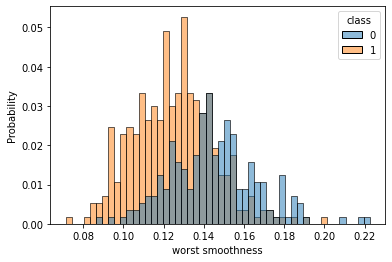

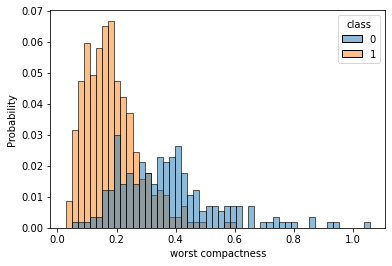

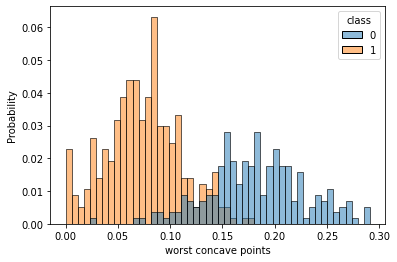

In [3]:
# 일부 속성만가지고 PAIRPLOT 그리기

cols = ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean concave points', 
        'worst radius', 'worst texture', 'worst smoothness', 'worst compactness', 'worst concave points', 'class']

for c in cols[:-1]:
    sns.histplot(df, x = c, hue = cols[-1], bins = 50, stat = 'probability')
    plt.show()

# 0번 클래스 : 파란색, 1번 클래스 : 주황색
# 겹치는 영역이 적을수록 좋은 속성이라고 볼 수 있다.

### 2. 학습 코드 구현

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Numpy 데이터를 파이토치 실수형 텐서로 변환

data = torch.from_numpy(df[cols].values).float()

# 입력 x와 출력 y로 나눈기

x = data[:, :-1]
y = data[:, -1:]
print(x.shape, y.shape)

torch.Size([569, 10]) torch.Size([569, 1])


In [15]:
# 학습에 필요한 설정값을 정한다.

n_epochs = 200000
learning_late = 1e-2
print_interval = 10000

- 선형 회귀에서는 선형 계층 하나만 필요했지만 로지스틱은 시그모이드 함수도 모델에 포함시켜야 한다. 따라 nn.Module을 상속받아 클래스를 정의하고 내부에 필요한 계층들을 소유하도록한다.

- 앞에서 한 것처럼 모듈을 상속받은 자식 클래스를 정의할 때는 보통 두 개의 함수(메서드)를 오버라이드한다. 또한 __init__ 함수를 통해 모델을 구성하는데 필요한 내부 모듈을 미리 선언한다.

In [16]:
# 모델 생성

class Mymodel(nn.Module):
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim

        super().__init__()

        self.linear = nn.Linear(input_dim, output_dim)
        self.act = nn.Sigmoid()

    def forward(self, x):
        y = self.act(self.linear(x))
        return y

In [17]:
model = Mymodel(input_dim = x.size(-1),
                output_dim = y.size(-1))
crit = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = learning_late)

In [18]:
# 학습 수행

for i in range(n_epochs):
    y_hat = model(x)
    loss = crit(y_hat, y)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if (i+1) % print_interval == 0:
        print('Epoch %d: loss=%.4e' % (i+1, loss))

Epoch 10000: loss=2.8236e-01
Epoch 20000: loss=2.3167e-01
Epoch 30000: loss=2.0161e-01
Epoch 40000: loss=1.8210e-01
Epoch 50000: loss=1.6854e-01
Epoch 60000: loss=1.5858e-01
Epoch 70000: loss=1.5096e-01
Epoch 80000: loss=1.4494e-01
Epoch 90000: loss=1.4006e-01
Epoch 100000: loss=1.3602e-01
Epoch 110000: loss=1.3262e-01
Epoch 120000: loss=1.2972e-01
Epoch 130000: loss=1.2720e-01
Epoch 140000: loss=1.2500e-01
Epoch 150000: loss=1.2306e-01
Epoch 160000: loss=1.2133e-01
Epoch 170000: loss=1.1978e-01
Epoch 180000: loss=1.1839e-01
Epoch 190000: loss=1.1712e-01
Epoch 200000: loss=1.1596e-01


### 3. 결과 확인
- 분류 문제이므로 분류 예측 결과에 대한 정확도 평가가 가능하다

In [19]:
correct_cnt = (y == (y_hat > .5)).sum()
total_cnt = float(y.size(0))

print('Accuracy: %.4f' % (correct_cnt / total_cnt))

Accuracy: 0.9666


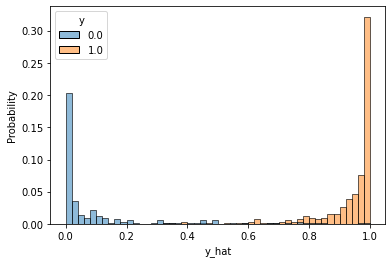

In [20]:
df = pd.DataFrame(torch.cat([y, y_hat], dim = 1).detach_().numpy(),
                  columns = ['y', 'y_hat'])

sns.histplot(df, x = 'y_hat', hue = 'y', bins = 50, stat = 'probability')
plt.show()

# 각 클래스가 양 극단으로 나눠졌다면에 모델이 예측을 잘하고 있다고 판단 할 수 있다.
# 현재 그래프는 일부 샘플들이 중간에 혼재하고있다.

## 8.6 마치며

### 요약

1. 비선형 활성함수
 - 시그모이드 : 0~1의 값을 가진다.
 - 하이퍼볼릭 탄젠트 : -1~1의 값을 가진다.

2. 로지스틱 회귀
 - 로지스틱 회귀는 이진 분류를 수행하는 함수를 학습하는 알고리즘
 - 선형 계층의 출력값을 시그모이드 함수에 통과시켜 0~1의 값으로 만들고 0.5 >= 이면 참, < 0.5이면 거짓으로 분류
 - BCE 손실 함수를 활용하여 학습할 수 있으며, 나머지 학습 방법은 대등소이하다.
 - 로지스틱 회귀 모델의 출력값의 출력을 확률로 생각할 수 있다.